### ED Figure 6

In [1]:
%run IMP.ipynb

#### Input Data

In [2]:
year1,year2,yearE = 2110,2159,2179
hov_year_net,hov_mean_net ,hov_diff_net   = cal_hov3('net',year1,year2,yearE)
hov_year_salt,hov_mean_salt,hov_diff_salt = cal_hov3('salt',year1,year2,yearE)
hov_year_heat,hov_mean_heat,hov_diff_heat = cal_hov3('heat',year1,year2,yearE)

isopycnal_bins = hov_mean_net.isopycnal_bins

In [3]:
S = hov_year_net.shape
hov = xr.DataArray(np.zeros((3,S[0],S[1])))
hov[0,:,:] = hov_year_net
hov[1,:,:] = hov_year_salt
hov[2,:,:] = hov_year_heat

#### Plot

In [4]:
nyr=2001-2110
title = 'Surface water-mass transformation ['+str(year1+nyr)+'-'+str(year2+nyr)+']'

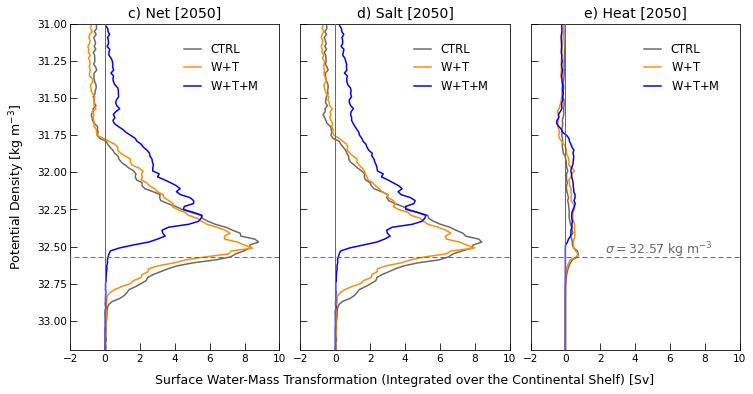

In [5]:
''''''
ncol = 3
ncomp = 3

colors = ['Dimgray','Darkorange','Blue']
dashes = ['-','-','-']

labels1 = ['c)','d)','e)']
labels2 = ['Net ['+str(year2+nyr)+']','Salt ['+str(year2+nyr)+']','Heat ['+str(year2+nyr)+']']
legends = ['CTRL','W$+$T','W$+$T$+$M']
''''''
fig = plt.figure(1,figsize=(12,6))
gs = gridspec.GridSpec(1,ncol,width_ratios=[1,1,1])
gs.update(wspace=0.1)

for ii in np.arange(0,ncol,1):
    ax = plt.subplot(gs[ii])
    ax.set_title(labels1[ii]+' '+labels2[ii],fontsize=14,loc='center',y=1.0)
    for jj in range(0,3,1):
        plt.plot(hov[ii,jj,:],isopycnal_bins,linewidth=1.5,color=colors[jj],linestyle=dashes[jj],label=legends[jj])
    ###
    if ii==1:
        ax.set_xlabel(r'Surface Water-Mass Transformation (Integrated over the Continental Shelf) [Sv]',fontsize=12.5,labelpad=10)
    elif ii==2:
        ax.annotate('$\sigma=$'+str(dmax)+' kg m$^{-3}$',xy=(2.25,dmax-0.02),color='dimgray',fontsize=12.5)
        
    leg = ax.legend(fontsize=11.5,handlelength=1.5,ncol=1,loc='upper right',bbox_to_anchor=(0.95,0.975))
    plt.setp(leg.get_texts(),color='black')
    plt.setp(leg.get_texts(),color='black')
    leg.get_frame().set_facecolor('white')
    leg.get_frame().set_edgecolor('black')
    leg.get_frame().set_linewidth(0.0)
    
    ax.plot([0,0],[31,33.2],linestyle='-',linewidth=1,color='dimgray',zorder=5)
    ax.plot([-5,15],[dmax,dmax],linestyle=(0,(5,3)),linewidth=1,color='dimgray',zorder=5)
    
    ax.set_xlim([-2,10])
    ax.set_ylim([33.20,31])
    ax.set_xticks(np.arange(-2,10+0.01,2))
    ax.set_yticks(np.arange(31,33.20+0.01,0.25))
    ax.tick_params(labelsize=10.5,direction='in',length=7)
    ax.set_ylabel(r'Potential Density [kg m$^{-3}$]',fontsize=12.5,labelpad=10)
    
for ax in fig.get_axes():
    ax.label_outer()